# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [307]:
MY_UNIQNAME = "mattcalc"  # fill this in with your uniqname

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [502]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# importing sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")

In [309]:
customer_df = pd.read_csv("../data/marketing_campaign.csv", delimiter="\t")
customer_df.columns = customer_df.columns.str.lower()

In [310]:
customer_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [362]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   income               2240 non-null   float64       
 4   kidhome              2240 non-null   int64         
 5   teenhome             2240 non-null   int64         
 6   dt_customer          2240 non-null   datetime64[ns]
 7   recency              2240 non-null   int64         
 8   mntwines             2240 non-null   int64         
 9   mntfruits            2240 non-null   int64         
 10  mntmeatproducts      2240 non-null   int64         
 11  mntfishproducts      2240 non-null   int64         
 12  mntsweetproducts     2240 non-null   int64         
 13  mntgoldprods         2240 non-nul

In [361]:
customer_df.dt_customer = pd.to_datetime(
    customer_df.dt_customer, format="%d-%m-%Y"
)

In [312]:
customer_df.isna().any(axis=0)

id                     False
year_birth             False
education              False
marital_status         False
income                  True
kidhome                False
teenhome               False
dt_customer            False
recency                False
mntwines               False
mntfruits              False
mntmeatproducts        False
mntfishproducts        False
mntsweetproducts       False
mntgoldprods           False
numdealspurchases      False
numwebpurchases        False
numcatalogpurchases    False
numstorepurchases      False
numwebvisitsmonth      False
acceptedcmp3           False
acceptedcmp4           False
acceptedcmp5           False
acceptedcmp1           False
acceptedcmp2           False
complain               False
z_costcontact          False
z_revenue              False
response               False
dtype: bool

In [313]:
customer_df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

#### Plots

In [314]:
# for column in customer_df.columns:
#     sns.histplot(customer_df[column])
#     plt.title("Histogram of " + column)
#     plt.show()

histogram_cols = [
    "year_birth",
    "education",
    "marital_status",
    "income",
    "recency",
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods",
    "numdealspurchases",
    "numwebpurchases",
    "numcatalogpurchases",
    "numstorepurchases",
    "numwebvisitsmonth",
]

# for column in histogram_cols:
#     sns.histplot(customer_df[column])
#     plt.title("Histogram of " + column)
#     plt.show()

In [315]:
def basic_histogram(column):
    plot = sns.histplot(column)
    plt.title("Histogram of " + column.name)
    print(column.describe())
    return plot

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64


<Axes: title={'center': 'Histogram of year_birth'}, xlabel='year_birth', ylabel='Count'>

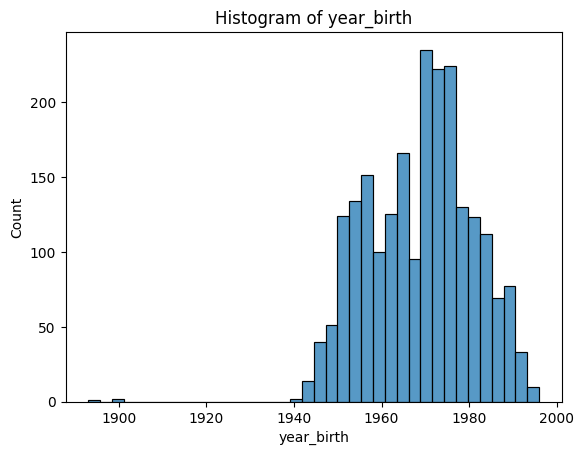

In [316]:
basic_histogram(customer_df["year_birth"])

count           2240
unique             5
top       Graduation
freq            1127
Name: education, dtype: object


<Axes: title={'center': 'Histogram of education'}, xlabel='education', ylabel='Count'>

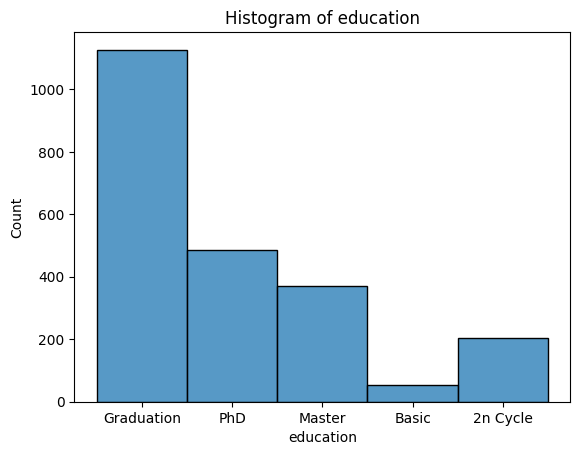

In [317]:
basic_histogram(customer_df["education"])

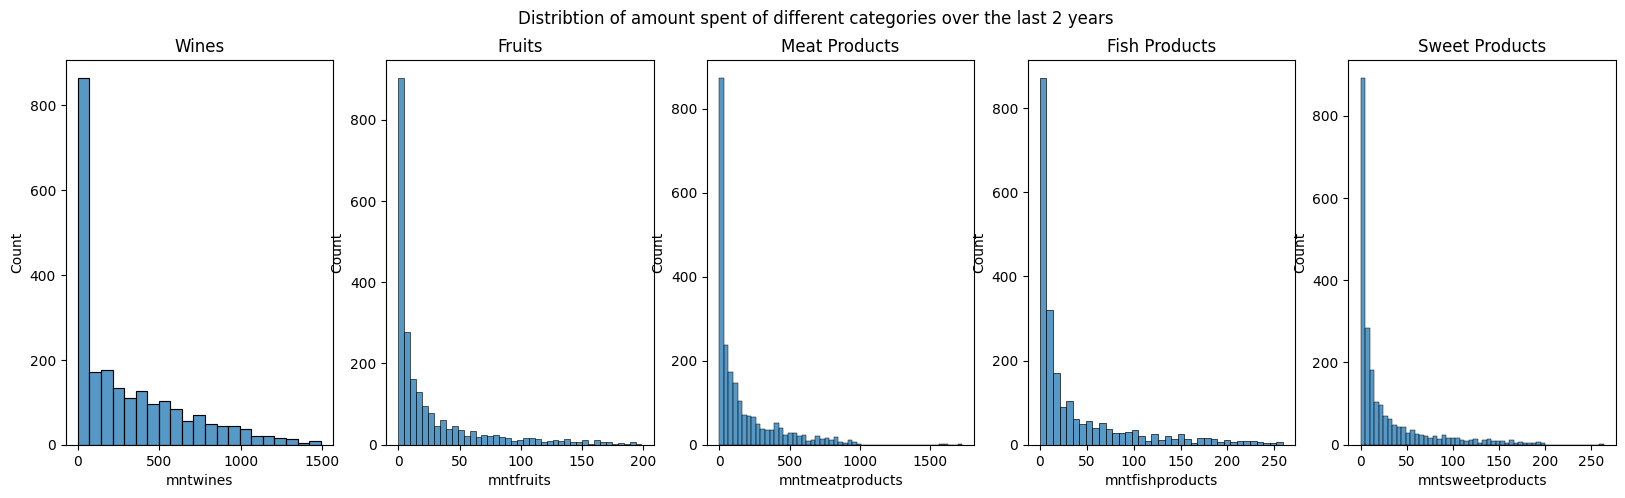

In [318]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle(
    "Distribtion of amount spent of different categories over the last 2 years"
)
sns.histplot(customer_df["mntwines"], ax=axes[0])
axes[0].set_title("Wines")
sns.histplot(customer_df["mntfruits"], ax=axes[1])
axes[1].set_title("Fruits")
sns.histplot(customer_df["mntmeatproducts"], ax=axes[2])
axes[2].set_title("Meat Products")
sns.histplot(customer_df["mntfishproducts"], ax=axes[3])
axes[3].set_title("Fish Products")
sns.histplot(customer_df["mntsweetproducts"], ax=axes[4])
axes[4].set_title("Sweet Products")
plt.show()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64


<Axes: title={'center': 'Histogram of income'}, xlabel='income', ylabel='Count'>

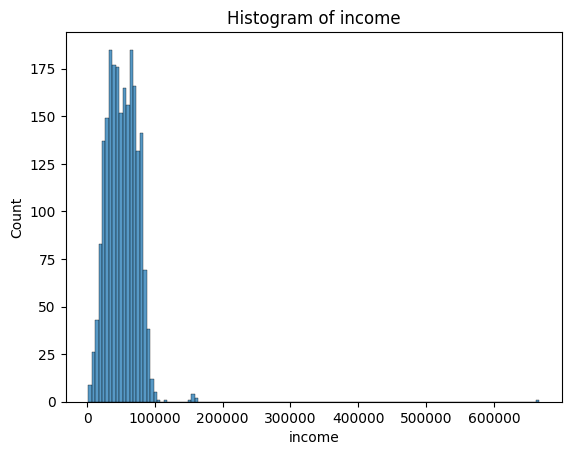

In [319]:
basic_histogram(customer_df["income"])

count        2240
unique          8
top       Married
freq          864
Name: marital_status, dtype: object


<Axes: title={'center': 'Histogram of marital_status'}, xlabel='marital_status', ylabel='Count'>

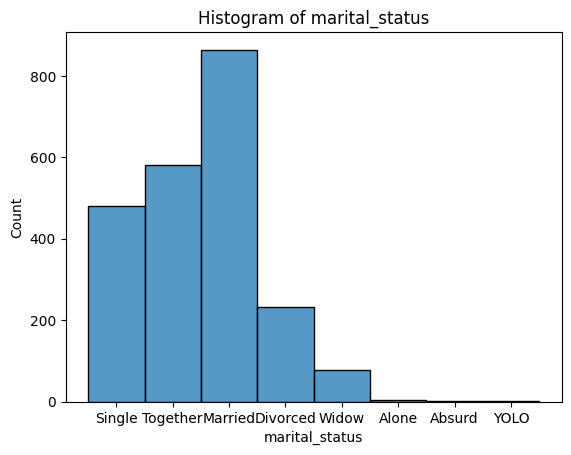

In [320]:
basic_histogram(customer_df["marital_status"])

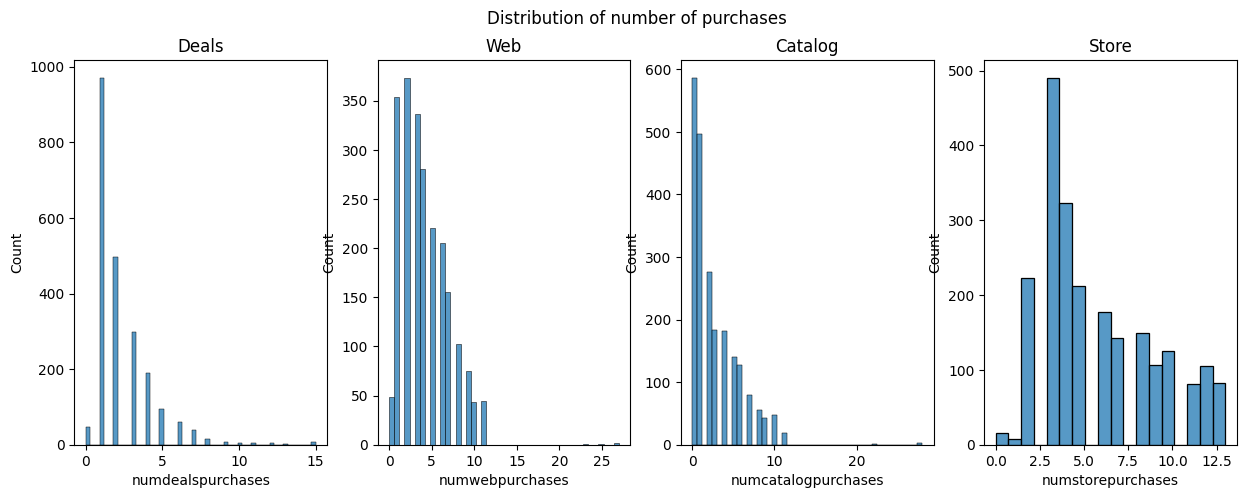

In [321]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle("Distribution of number of purchases")
sns.histplot(customer_df["numdealspurchases"], ax=axes[0])
axes[0].set_title("Deals")
sns.histplot(customer_df["numwebpurchases"], ax=axes[1])
axes[1].set_title("Web")
sns.histplot(customer_df["numcatalogpurchases"], ax=axes[2])
axes[2].set_title("Catalog")
sns.histplot(customer_df["numstorepurchases"], ax=axes[3])
axes[3].set_title("Store")
plt.show()


# Data Overview
### Null Values
The dataset has 2240 rows and 29 columns. There is one column with null values `income`


#### year_birth
The year_birth column has a minimum value of 1893 and a maximum value of 2001. The mean is 1968.8 and the median is 1970. The standard deviation is 11.98. The distribution is roughly normal and there are a few outliers on the left side of the distribution around 1900.

#### education
There are 5 value in the dataset for education. The most common value is  graduation. The least common value was Basic. 

It is important to note that there is a 2n Cycle value which corresponds to graduate or master level studies. 

#### Amount spent in the last 2 years
There are 5 variables which represent the amount which the customers have spent on different categories over the last 2 years:
- mntwines
- mntfruits
- mntmeatproducts
- mntfishproducts
- mntsweetproducts

The distributions for each category were graphed and found to be very similar. The distribtion for each of the categories is skewed to the right, with the majority of customers spending around 0, and the number of customers reduces and the amount spent increases. 

#### Income
The income column has a minimum value of 1730 and a maximum value of 666666. The mean is 52247.25 and the median is 51381.5. The standard deviation is 25173.08. The outlier at 666,666 is assumed to not be an exact value is is likely a data entry error, or a value greater than 666,666 which exceeds the maximum income of the system. 

The distribution of incomes appears to be roughly normal with a slight right skew. There is a clustering of incomes  outside of the main distribution around 150,000.

#### acceptedcmp
Acceptedmp1-5 and response, columns indicate the period in which the customers accepted a campaign. The columns are binary and indicate whether the customer accepted the campaign or not. The majority of customers did not accept the campaign.

#### Marital Status
The majority of customers are married. The most common values are as follows:
- Married 0.48
- Together 0.25
- Single 0.15
- Divorced 0.11
- Widow 0.01

It is important to note that there are a couple customers with unexpected values such as:
- Alone
- Absurd
- YOLO

### Number of Purchases
There are 4 columns which indicate the number of purchases the customer has made in the last 2 years:
- numdealspurchases
- numcatalogpurchases
- numstorepurchases
- numwebpurchases

The distributions of these 4 variables have been shown in histograms.

The distributions are all skewed to the right. Web, Catalogue, and Deals purchases all show outliers on the far right of the distribution.




## Task 2 (1 point): Drop all columns that have constant values.

In [322]:
for column in customer_df.columns:
    if customer_df[column].nunique() == 1:
        customer_df.drop(column, axis=1, inplace=True)
        print(f"dropped {column} because it only has 1 unique value")

dropped z_costcontact because it only has 1 unique value
dropped z_revenue because it only has 1 unique value


Columns `z_costcontact` and `z_revenue` were dropped as they had constant values.

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [323]:
customer_df["in_relationship"] = customer_df.copy().marital_status.apply(
    lambda x: 1 if x in ["Married", "Together"] else 0
)
customer_df.drop("marital_status", axis=1, inplace=True)
customer_df.columns

Index(['id', 'year_birth', 'education', 'income', 'kidhome', 'teenhome',
       'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'in_relationship'],
      dtype='object')

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [324]:
# median and mean income
customer_df.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [325]:
# fills in missing income values with median income using SimpleImputer
imp = SimpleImputer(strategy="median")
customer_df.income = imp.fit_transform(customer_df[["income"]])
customer_df.income.describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

## Missing income values
The median income value of the dataset was **51381.5**.

The missing values in the dataset for income were imputed with the median value.

The median value would be a reliable value to impute the missing values with as the distribution of income is roughly normal and the median is not affected by outliers. Since there is one large outlier at 666666 the median is a better selection than the mean.

Since the median was used, the quartiles for the dataset before and after the imputer were the same, and the median value does not affect the distribution of the data.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [326]:
# # drop the outlier from income
# customer_df = customer_df[customer_df.income < 600000].reset_index(drop=True)
# customer_df.income.describe()

In [327]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(
    customer_df, customer_df["in_relationship"]
):
    strat_train_set = customer_df.loc[train_index]
    strat_test_set = customer_df.loc[test_index]

In [328]:
wine_y = strat_train_set["mntwines"]
wine_X = strat_train_set[["income", "in_relationship"]]

In [329]:
lr = LinearRegression()
lr.fit(wine_X, wine_y)

LinearRegression()

In [330]:
wine_predictions = lr.predict(strat_test_set[["income", "in_relationship"]])
wine_predictions

array([  93.43160565,  267.80046169,  271.84627859,  324.71022131,
        273.91994102,  467.234635  ,  614.71838518,  294.62393773,
        232.59175582,  286.8260039 ,  183.88238853,  432.06207802,
        128.82887825,  329.57535238,  430.5250096 ,  434.24449897,
        281.08350213,  270.43246982,  442.44494327,  340.01611822,
        194.42476627,  504.58956095,  143.27200956,  355.82240827,
         32.91831377,  443.11924609,  169.91784668,  165.69801615,
        531.12663956,  390.90065589,  492.35785286,  384.73762118,
        470.5118917 ,  231.52592234,  481.46749984,   65.72718561,
        240.61088395,  319.43175588,  343.23537038,   46.4914289 ,
        160.49935895,  378.59644212,  405.11901959,  501.73278521,
         94.51194027,  330.17714952,  240.74864474,  193.90272538,
        279.16940417,   37.15994798,  555.24927904,  433.07720951,
         22.71681668,  319.76533398,  151.38534309,  263.86340331,
         82.6644603 ,  521.41087854,  153.21248621,  581.30782

In [331]:
wine_predictions_df = pd.DataFrame()
wine_predictions_df["income"] = customer_df["income"].head()
wine_predictions_df["in_relationship"] = customer_df["in_relationship"].head()
wine_predictions_df["mntwines"] = customer_df["mntwines"].head()
wine_predictions_df["predicted_mntwines"] = wine_predictions[:5]
wine_predictions_df

,income,in_relationship,mntwines,predicted_mntwines
0,58138.0,0,635,93.431606
1,46344.0,0,11,267.800462
2,71613.0,1,426,271.846279
3,26646.0,1,11,324.710221
4,58293.0,1,173,273.919941


In [425]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    lr, wine_X, wine_y, scoring="neg_mean_squared_error", cv=10
)
rmse_scores = np.sqrt(-scores)
np.mean(rmse_scores)

284.7451428391534

Insert your explanation and interpretation here.

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 5 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 7 clusters.  Compare the results to the 4 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [448]:
X = customer_df.copy().drop(["id", "dt_customer"], axis=1)
y = customer_df[["id"]]
X.head()

,year_birth,education,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,in_relationship
0,1957,Graduation,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,0
1,1954,Graduation,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,0
2,1965,Graduation,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,1
3,1984,Graduation,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,1
4,1981,PhD,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,1


In [403]:
# A list of columns based on their data type (numerical or categorical)
num_attribs = [
    "year_birth",
    "income",
    "kidhome",
    "teenhome",
    "recency",
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods",
    "numdealspurchases",
    "numwebpurchases",
    "numcatalogpurchases",
    "numstorepurchases",
    "numwebvisitsmonth",
    "acceptedcmp3",
    "acceptedcmp4",
    "acceptedcmp5",
    "acceptedcmp1",
    "acceptedcmp2",
    "complain",
    "response",
    "in_relationship",
]
cat_attribs = ["education"]

In [473]:
# Preprocessing pipeline to one-hot encode categorical variables and standardize numerical variables
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ]
)

In [504]:
# Pipeline to preprocess data and perform PCA
pipe1 = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("pca", PCA(n_components=5, random_state=42)),
    ]
)

# Takes past pipeline and forms 4 clusters
pipe2 = Pipeline(
    [
        ("pipeline", pipe1),
        ("clustering", AgglomerativeClustering(n_clusters=4)),
    ]
)
# Takes past pipeline and forms 7 clusters
pipe3 = Pipeline(
    [
        ("pipeline", pipe1),
        ("clustering", AgglomerativeClustering(n_clusters=7)),
    ]
)

In [493]:
# Fits 4 cluster model and predicts based on our dataset
y_pred = pipe2.fit_predict(X)
y_pred

array([1, 0, 1, ..., 2, 1, 0], dtype=int64)

In [505]:
# Fits 7 cluster model and predicts based on our dataset
y_pred2 = pipe3.fit_predict(X)
y_pred2

array([0, 2, 0, ..., 6, 0, 4], dtype=int64)

In [498]:
# Fit and transforms our data using PCA and preprocessing pipeline
pca_data = pipe1.fit_transform(X)

In [495]:
# Explained variance ratio for each component and the sum of the explained variance ratios
print(pipe1.named_steps.pca.explained_variance_ratio_)
print(sum(pipe1.named_steps.pca.explained_variance_ratio_))

[0.26423639 0.08230764 0.07705384 0.05746066 0.04530312]
0.5263616433395973


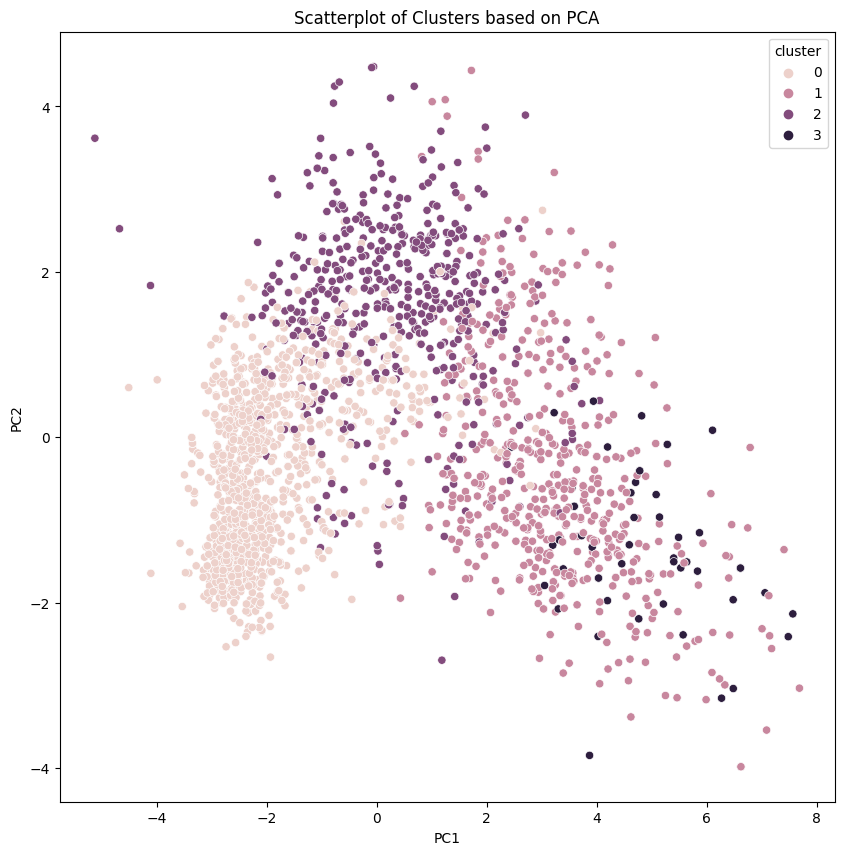

In [508]:
# Dataframe with the first two principal components from PCA and  cluster labels
princ_comp_df = pd.DataFrame(
    {"PC1": pca_data[:, 0], "PC2": pca_data[:, 1], "cluster": y_pred}
)

# Graph
plt.figure(figsize=(10, 10))
sns.scatterplot(data=princ_comp_df, x="PC1", y="PC2", hue="cluster")
plt.title("Scatterplot of Clusters based on PCA")
plt.show()

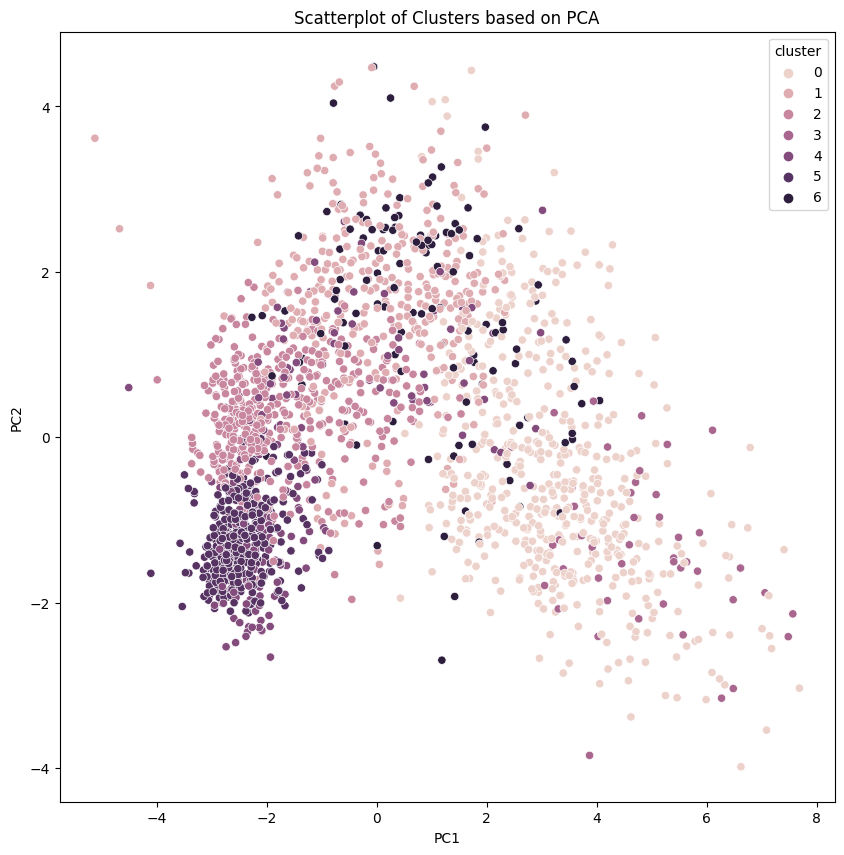

In [509]:
# Dataframe with the first two principal components from PCA and  cluster labels
princ_comp_df = pd.DataFrame(
    {"PC1": pca_data[:, 0], "PC2": pca_data[:, 1], "cluster": y_pred2}
)

# Graph
plt.figure(figsize=(10, 10))
sns.scatterplot(data=princ_comp_df, x="PC1", y="PC2", hue="cluster")
plt.title("Scatterplot of Clusters based on PCA")
plt.show()

Insert your explanations and interpretations here.

## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

In [ ]:
# insert your code here

Insert your explanations and interpretations here.

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

In [ ]:
# insert your code here

Insert your explanations and interpretations here.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.